<a href="https://colab.research.google.com/github/seecode4/seeRepo1/blob/main/capstone/explore3datasets/osic_pulmonary_fibrosis_progression_read_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OSIC Pulmonary Fibrosis Progression  - Dataset explored for Capstone

Predict lung function decline
Predict a patient’s severity of decline in lung function based on a CT scan of their lungs. Lung function is assessed based on output from a spirometer, which measures the forced vital capacity (FVC), i.e. the volume of air exhaled


In [1]:
! pip install opendatasets
import opendatasets as od
import pandas as pd

In [2]:
!pwd
!du -hs ./osic-pulmonary-fibrosis-progression/*
!du -hs ./osic-pulmonary-fibrosis-progression/test/*

/content
du: cannot access './osic-pulmonary-fibrosis-progression/*': No such file or directory
du: cannot access './osic-pulmonary-fibrosis-progression/test/*': No such file or directory


In [4]:
# Import train + test data
pf_inp_path = "https://www.kaggle.com/c/osic-pulmonary-fibrosis-progression/data"
od.download(pf_inp_path)
# {"username":<KAGGLE USERNAME>,"key":"<KAGGLE KEY>"}
# A progress bar will show if the dataset is downloaded completely or not.
# On executing the above line, it will prompt for Kaggle username.
# Kaggle username can be fetched from the Account tab of the My Profile section
# ! kaggle competitions download <name-of-competition>

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: seetha4
Your Kaggle Key: ··········


100%|██████████| 13.3G/13.3G [03:51<00:00, 62.0MB/s]



Extracting archive ./osic-pulmonary-fibrosis-progression/osic-pulmonary-fibrosis-progression.zip to ./osic-pulmonary-fibrosis-progression


In [5]:
# Browse directory for train and test csv files and example images
# Domain knowledge in lung disease would be useful to understand images
! pwd
!ls -al
!du -hs ./*
!du -hs ./osic-pulmonary-fibrosis-progression/*
!du -hs ./osic-pulmonary-fibrosis-progression/test/*
!ls ./osic-pulmonary-fibrosis-progression/test/ID00419637202311204720264/*

/content
total 20
drwxr-xr-x 1 root root 4096 Aug  5 23:31 .
drwxr-xr-x 1 root root 4096 Aug  5 23:28 ..
drwxr-xr-x 4 root root 4096 Aug  2 13:24 .config
drwxr-xr-x 4 root root 4096 Aug  5 23:41 osic-pulmonary-fibrosis-progression
drwxr-xr-x 1 root root 4096 Aug  2 13:24 sample_data
23G	./osic-pulmonary-fibrosis-progression
55M	./sample_data
28K	./osic-pulmonary-fibrosis-progression/sample_submission.csv
713M	./osic-pulmonary-fibrosis-progression/test
4.0K	./osic-pulmonary-fibrosis-progression/test.csv
22G	./osic-pulmonary-fibrosis-progression/train
108K	./osic-pulmonary-fibrosis-progression/train.csv
53M	./osic-pulmonary-fibrosis-progression/test/ID00419637202311204720264
70M	./osic-pulmonary-fibrosis-progression/test/ID00421637202311550012437
239M	./osic-pulmonary-fibrosis-progression/test/ID00422637202311677017371
147M	./osic-pulmonary-fibrosis-progression/test/ID00423637202312137826377
206M	./osic-pulmonary-fibrosis-progression/test/ID00426637202313170790466
./osic-pulmonary-fibros

In [6]:
# Get train and test csv files
df_train = pd.read_csv("./osic-pulmonary-fibrosis-progression/train.csv")
df_test = pd.read_csv("./osic-pulmonary-fibrosis-progression/test.csv")
# Train len
print("Total Recordings in Train Data: {:,}".format(len(df_train)))
print(df_train.shape, df_test.shape)
print(df_train.columns)

Total Recordings in Train Data: 1,549
(1549, 7) (5, 7)
Index(['Patient', 'Weeks', 'FVC', 'Percent', 'Age', 'Sex', 'SmokingStatus'], dtype='object')


In [7]:
print(df_train.head())

                     Patient  Weeks   FVC    Percent  Age   Sex SmokingStatus
0  ID00007637202177411956430     -4  2315  58.253649   79  Male     Ex-smoker
1  ID00007637202177411956430      5  2214  55.712129   79  Male     Ex-smoker
2  ID00007637202177411956430      7  2061  51.862104   79  Male     Ex-smoker
3  ID00007637202177411956430      9  2144  53.950679   79  Male     Ex-smoker
4  ID00007637202177411956430     11  2069  52.063412   79  Male     Ex-smoker


Ref: https://www.kaggle.com/code/andradaolteanu/pulmonary-fibrosis-competition-eda-dicom-prep/notebook

[What are CT scans capturing?](https://www.kaggle.com/c/osic-pulmonary-fibrosis-progression/discussion/167085)

[Dicom Files](https://fileinfo.com/extension/dicom#:~:text=A%20DICOM%20file%20is%20an,linked%20to%20a%20specific%20individual.):<br>
 A DICOM file is an image saved in the Digital Imaging and Communications in Medicine (DICOM) format.
 DICOM data can be extracted by using pydicom.dcmread()

[ What color maps should you use in medical visualisation?](http://noeskasmit.com/colormaps-in-medical-visualization/)

In [9]:
# colormaps to use for image display
class bcolors:
    OKBLUE = '\033[96m'
    OKGREEN = '\033[92m'

Explore how to read image information in dicom format

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 47.6 MB/s eta 0:00:00
Patient id.......: ID00419637202311204720264 
Modality.........: CT 
Rows.............: 1100 
Columns..........: 888


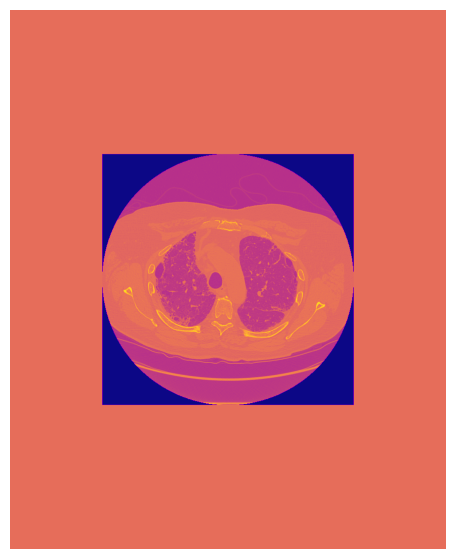

In [10]:
# Use dcmread to get one image and plot
!pip install pydicom
import matplotlib.pyplot as plt
from pydicom import dcmread

# path = "../input/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/19.dcm"
path = "./osic-pulmonary-fibrosis-progression/test/ID00419637202311204720264/10.dcm"

dataset = dcmread(path)

print(bcolors.OKBLUE + "Patient id.......:", dataset.PatientID, "\n" +
      "Modality.........:", dataset.Modality, "\n" +
      "Rows.............:", dataset.Rows, "\n" +
      "Columns..........:", dataset.Columns)

plt.figure(figsize = (7, 7))
plt.imshow(dataset.pixel_array, cmap="plasma")
plt.axis('off');